#
(a) (2 points) Calculate recursively F(n) by applying the top-down procedure Fib( ) which calls
itself. Use your favorite programming language to write Fib( ). Test Fib( ) for different
numerical values of n to make sure that Fib(n) correctly calculates F(n). You can use the
formula for F(n) given in item (f) below to check your numerical results.

In [89]:
import numpy as np
import matplotlib as plt
import pandas as pd
import math
import matplotlib.pyplot as plt 

#Defining the Fibonacci recurrence function

def Fib(n):
    assert n >= 0
    if(n == 0): #Defining the n = 0 case
        return 0
    elif(n == 1): #Defining the n = 1 case
        return 1
    else:
        return Fib(n-1) + Fib(n-2)


array_fib = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

def checking():
    #Testing some values of the Fibonacci recursion
    global array_fib
    errors = 0
    for i in range (8):
        if (array_fib[i] != Fib(i)):
            errors += 1
    print("The number of errors has been: {}".format(errors))    
    
checking()





The number of errors has been: 0


# 
(b) (2 points) Draw the recursion tree for Fib(5). Let's denote by T(n) the total number of calls
to Fib( ) needed to calculate F(n) (note that T(n) includes the original call to Fib(n) at the root).
What is the value of T(5)?

In [90]:
a = (1 + math.sqrt(5))/2
b =  (1 - math.sqrt(5))/2        
F = (a + b) / math.sqrt(5) #What is the double prima? Derivatives?  


#
(c) (4 points) What is the recurrence for T(n)? What are the initial conditions of this recurrence?

c.1) 
T(n) = T(n-1) - T(n-3) + T(n-1) = 2 * T(n-1) - T(n-3)
This recursioin has been obtained due to the fact that, the value of T(n) will always be the value of T(n-1) added to the difference between T(n) and T(n-1).  As t(n) is the adittion between the previous to items, the difference between T(n) and T(n-1) will always be T(n-1) - T(n-3), that is to say, the sum of the new element that enters into the addition, and the substraction of the old element that is left out of the calculation. T(n-2) does not appear in the equation due to the fact that it would appear twice, one summing and other one substracting, therefore it can be simplified.  

c.2) 
The initial conditions of this recurrence are as following:
T(0) = T(1) = 1
Due to the fact that we already have the F(0) and F(1) values, we only need to call F(n) one time.



#
(d) (2 points) Use Fib( ) to empirically verify that T(n)=2F(n+1)-1.


In [91]:
def recurrence_T(n):
    if ((n == 0) or (n == 1)):
        return 1
    if (n == 2):
        return 3
    else:
        return (2*recurrence_T(n-1) - recurrence_T(n-3))

def T(n):
    return 2*Fib(n+1) - 1

array_recurrence_T = []
array_T = []

n = 6

for i in range(n):
    array_recurrence_T.append(recurrence_T(i))
    array_T.append(T(i))
    
print(array_T)
print(array_recurrence_T)

[1, 1, 3, 5, 9, 15]
[1, 1, 3, 5, 9, 15]


#
(e) (4 points) Given the recurrence for T(n) found in item (c) above, prove by induction that the
formula T(n)=2F(n+1)-1 is correct.

PROVE BY INDUCTION, AS CHLEBUS DOES IN CLASS

#
(f) (2 points) Use the formula given in item (d) to find the asymptotic complexity T(n)=O(?)
of Fib( ). The closed-form expression for the Fibonacci numbers F(n) = ϕ
n−ψ
n
√5
, where
ϕ =
1+√5
2
and ψ=
1−√5
2
, may be helpful. 

T(N) = 2*F(n+1) - 1


#
(g) (2 points) Implement in your favorite programming language the bottom-up iterative
procedure Better_Fib( ) with “memoization” for better performance. Test Better_Fib( ) for
different numerical values of n to make sure that it correctly calculates F(n). You can use the
formula for F(n) given in item (f) above to check your numerical results.

In [102]:
from functools import lru_cache

@lru_cache(maxsize=None) #Importing a built-in decorator of python that implements memoization

def fib(n):
    if n < 2:  # base case
        return n
    return fib(n-1) + fib(n-2)

alert = 0
for i in range(number): #Checking that calculations with memoization are accurate
    if(fib(i) != Fib(i)):
        alert = 1
if (alert == 1):
    print("The fib recursion with memoization IS NOT ACCURATE")
else:
    print("The fib recursion with memoization IS ACCURATE")

The fib recursion with memoization IS ACCURATE


#
(h) (1 point) What is the asymptotic complexity TBF(n)=O(?) of Better_Fib( )?

In [93]:
#Even if not asked, here we will perform an experiment running both recursions, 
#the one with memoization and the one without. The running time for both will be measured.
# ONLY WHAT MEASURED CAN BE IMPROVED!!!!!!!

import time

number = 32 #Enter a even number if possible 

In [98]:
#Recursion with and without memoization
stepsize = int(number / 20)
init = 20
y_Fib = []
y_fib = []

def runtime(bool, n):
    begin = time.time()
    if (bool == 0): #If the boolean is 0, we run without memoization
        Fib(n)
    elif (bool == 1):    
        fib(n)
    end = time.time()
    return round(end-begin, 15)
    
for i in range(init, number, stepsize):
    y_Fib.append(runtime(0, i)) #Filling result array without memoization
    y_fib.append(runtime(1, i)) #Filling result array with memoization
    #print(runtime(0, i))
    #print(runtime(1, i))

h = 5
print(y_Fib[h:])
print(y_fib[h:])

[0.040916681289673, 0.064802169799805, 0.108693361282349, 0.169315576553345, 0.270275592803955, 0.439883232116699, 0.684136390686035]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


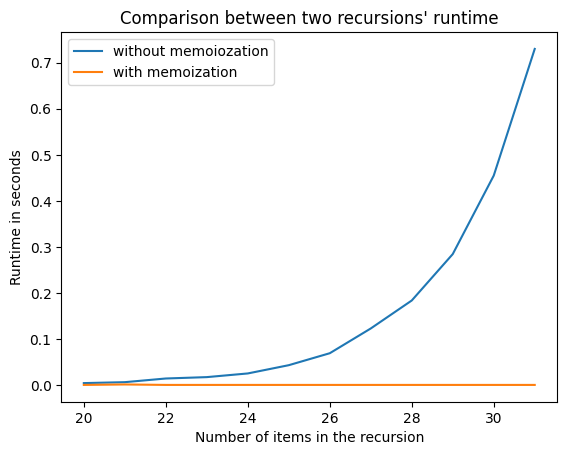

In [95]:
#RUNTIME FINAL ANALYSIS

x_array = range(init, number, stepsize)

plt.xlabel("Number of items in the recursion")
plt.ylabel("Runtime in seconds")
plt.title("Comparison between two recursions' runtime")
plt.plot(x_array, y_Fib, label = "without memoiozation")
plt.plot(x_array, y_fib, label = "with memoization")
plt.legend(loc="upper left")
plt.show()

CORRECCIONES NECESARIAS ESCRITAS POR FERRO Y A MIRAR POR LOS 3 CUANDO NOS JUNTEMOS:

a) what is top-down procedure? igual lo menciona en clase en dudas, ferro igual ha empezado muy pronto a hacerlo

g) the bottom-up? 

T(n) grows exponnetially with n

g) mirar a ver si "fib(n)" se puede definir de una manera mas casera o elegante, sin usar decoradores de python que he cogido de un código